## Caso Práctico de Módulo 5: Optimización de campañas de marketing online




El presente ejercicio es similar al caso práctico de repaso de optimización de campañas de marketing online ya realizado y lo que se pretende con este es asentar los conceptos relativos al algoritmo del bandido multibrazo, como son las ratios de explotación y exploración para la optimización de una campaña de marketing online.

Al igual que en el caso práctico de repaso, se tiene que hacer una campaña de marketing online para promocionar un determinado producto con la que se mostrará en una página web un banner con una imagen del producto que promocionar. Se han realizado cinco imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto que promocionar, pero, a diferencia del caso práctico de repaso, los resultados obtenidos serán diferentes, siendo otra imagen la que mayor valor de Q tenga calculado a partir de la siguiente fórmula:

<div style="text-align: center;">
    <img src="./imgs/img_mb.png" style="width: 500px;"/>
</div>

Sin saber a priori cuál es la imagen que captará mayor atención, se debe aprender con base en los clics que se realizan sobre el banner qué imagen será las más llamativa y conseguirá más visitas aplicando el método del bandido multibrazo.

El objetivo es encontrar la imagen que capte mayor atención de los usuarios, es decir que mayor número de clics obtenga:

Dado el método ya implementado en el notebook “multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)”, se pide, modificando el valor de épsilon, responder a la siguientes preguntas para asentar los conceptos relativos al aprendizaje por refuerzo y, en particular, al algoritmo del bandido multibrazo:

1. ¿Cuál es el valor de épsilon que maximiza la imagen con mayor número de clics?
2. ¿Cuál es la imagen que más clics obtiene y cuántos?
3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene?

In [11]:
#Importamos las librerías
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Caso con probabilidades fijas para cada imagen

In [30]:
#Definimos las probabilidades de cada imagen
bandits_prob_f = [0.1, 0.2, 0.6, 0.1, 0.3] #asignamos una mayor probabilidad a la tercera imagen

In [31]:
#Definimos la función
    
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = bandits_prob_f
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        old_q_bandits = q_bandits.copy()
        
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualizo reward total
        total_reward += reward
        
        # Actualizo valor (Q) de la imagen
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit

Epsilon-greedy = 0.05
Initial Bandits Distribution
  [0.1, 0.2, 0.6, 0.1, 0.3]
Bandits Distribution games
  [ 45.   8. 926.   7.  14.]
Q(a) Bandits
  [0.1333 0.125  0.5907 0.1429 0.4286]
CLICKS: 561

-----------------------------------------------------

Epsilon-greedy = 0.1
Initial Bandits Distribution
  [0.1, 0.2, 0.6, 0.1, 0.3]
Bandits Distribution games
  [ 17.  87. 851.  17.  28.]
Q(a) Bandits
  [0.1176 0.2299 0.6157 0.1176 0.3571]
CLICKS: 558

-----------------------------------------------------

Epsilon-greedy = 0.15
Initial Bandits Distribution
  [0.1, 0.2, 0.6, 0.1, 0.3]
Bandits Distribution games
  [ 33.  22. 892.  27.  26.]
Q(a) Bandits
  [0.0909 0.2273 0.5863 0.0741 0.3077]
CLICKS: 541

-----------------------------------------------------

Epsilon-greedy = 0.2
Initial Bandits Distribution
  [0.1, 0.2, 0.6, 0.1, 0.3]
Bandits Distribution games
  [ 30.  46. 843.  34.  47.]
Q(a) Bandits
  [0.0667 0.1304 0.5991 0.0882 0.3191]
CLICKS: 531

-------------------------------------

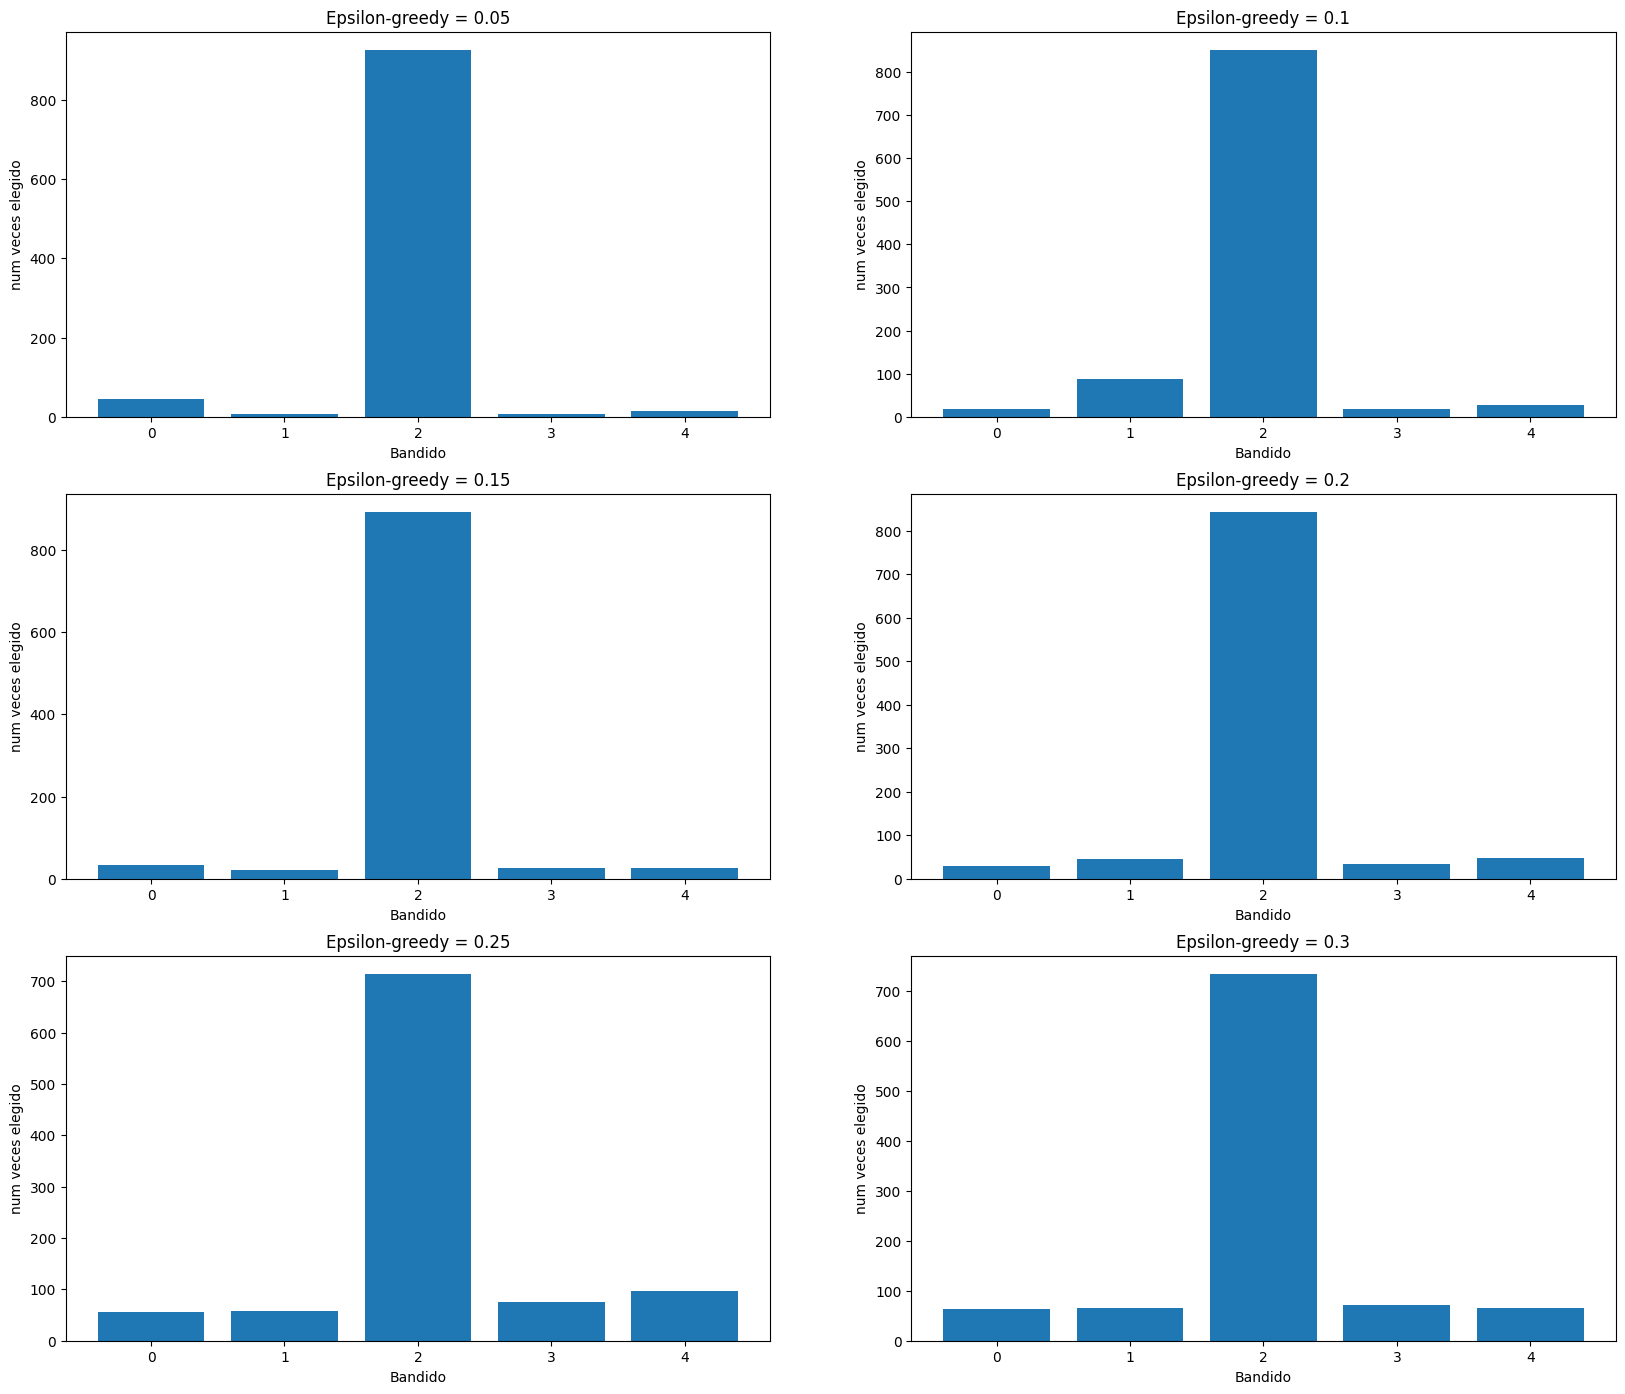

In [27]:
#Generamos un primer ejercicio con un un rango entre 0.05-0.30 de exploración

epsilon_range = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] # PREGUNTA 1

np.set_printoptions(precision=4)

plt.figure(figsize=(20, 35))
pos = 0
for ep in epsilon_range:
    pos += 1    

    bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                            epsilon=ep, 
                                                                            verbose=False)

    print('Epsilon-greedy = {epsi}'.format(epsi=ep))
    print("Initial Bandits Distribution\n  {}".format(bandits))
    print("Bandits Distribution games\n  {}".format(num_selected_bandit))
    print("Q(a) Bandits\n  {}".format(q_bandits))
    print("CLICKS: {}".format(total_reward))
    print("")
    print("-----------------------------------------------------")
    print("")

    # Mostramos en una gráfica de barras el número de veces que elegimos cada imagen
    plt.subplot(6, 2, pos)
    plt.title('Epsilon-greedy = {epsi}'.format(epsi=ep))
    plt.bar(range(0,len(bandits)), num_selected_bandit)
    plt.xlabel('Bandido')
    plt.ylabel('num veces elegido')

plt.show()

### Respuestas a las preguntas:


* Modificando la constante "EPSILON" que es el ratio de exploración:


1. ¿Cuál es el valor de épsilon que maximiza la imagen con mayor número de clicks?
    + ***RESPUESTA***: Vemos en el ejercicio realizado que el valor de épsilon que maximiza el número de clicks varia en el rango de [0.05-0.2], siendo a partir de 0.25 que se evidencia una caída en el número de clicks.


2. ¿Cuál es la imagen que más clics obtiene y cuántos?
    + ***RESPUESTA***: Es la imagen C (en la gráfica la imagen 2) con un número de clicks que ronda entorno a 550.

Initial Bandits Distribution
  [0.1, 0.2, 0.6, 0.1, 0.3]
Bandits Distribution games
  [  1.   0.   1.   1. 997.]
Q(a) Bandits
  [0.     0.     0.     0.     0.2828]
CLICKS: 282


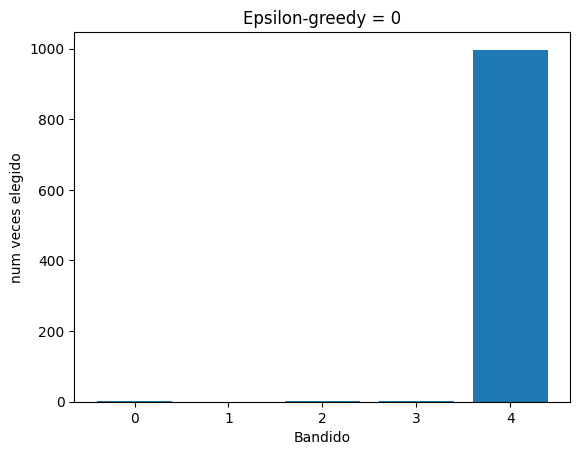

In [29]:
#Generamos un ejercicio adicional con un ratio de explotación del 100%

EPSILON = 0   # PREGUNTA 3

np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene?
    + ***RESPUESTA***: Con este ratio de exploración a 0 (epsilon a 0) que significa que explotamos el 100% de las veces, vemos que vamos a seleccionar como imagen a mostrar aquella que primero obtenga un click, ya que una vez que esa haya obtenido recompensa se seleccionará la misma ya que estaremos explotando la información que tenemos, sin explorar las otras opciones.

### Caso con probabilidades variables para cada imagen

In [36]:
#Definimos las probabilidades
bandits_prob_v = [0.1, 0.2, 0.6, 0.1, 0.3]
random.shuffle(bandits_prob_v)

In [37]:
#Definimos la función
    
def multi_armed_bandit_v(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = bandits_prob_v
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        old_q_bandits = q_bandits.copy()
        
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualizo reward total
        total_reward += reward
        
        # Actualizo valor (Q) de la imagen
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit

Epsilon-greedy = 0.05
Initial Bandits Distribution
  [0.3, 0.2, 0.1, 0.1, 0.6]
Bandits Distribution games
  [ 13.  14.  12.  11. 950.]
Q(a) Bandits
  [0.2308 0.3571 0.     0.1818 0.6011]
CLICKS: 581

-----------------------------------------------------

Epsilon-greedy = 0.1
Initial Bandits Distribution
  [0.3, 0.2, 0.1, 0.1, 0.6]
Bandits Distribution games
  [ 18.  19.  17.  17. 929.]
Q(a) Bandits
  [0.3333 0.     0.1176 0.1176 0.5802]
CLICKS: 549

-----------------------------------------------------

Epsilon-greedy = 0.15
Initial Bandits Distribution
  [0.3, 0.2, 0.1, 0.1, 0.6]
Bandits Distribution games
  [ 28.  29.  33.  20. 890.]
Q(a) Bandits
  [0.25   0.069  0.0606 0.1    0.6326]
CLICKS: 576

-----------------------------------------------------

Epsilon-greedy = 0.2
Initial Bandits Distribution
  [0.3, 0.2, 0.1, 0.1, 0.6]
Bandits Distribution games
  [ 29.  45.  48.  51. 827.]
Q(a) Bandits
  [0.3448 0.2444 0.0417 0.1176 0.5949]
CLICKS: 521

-------------------------------------

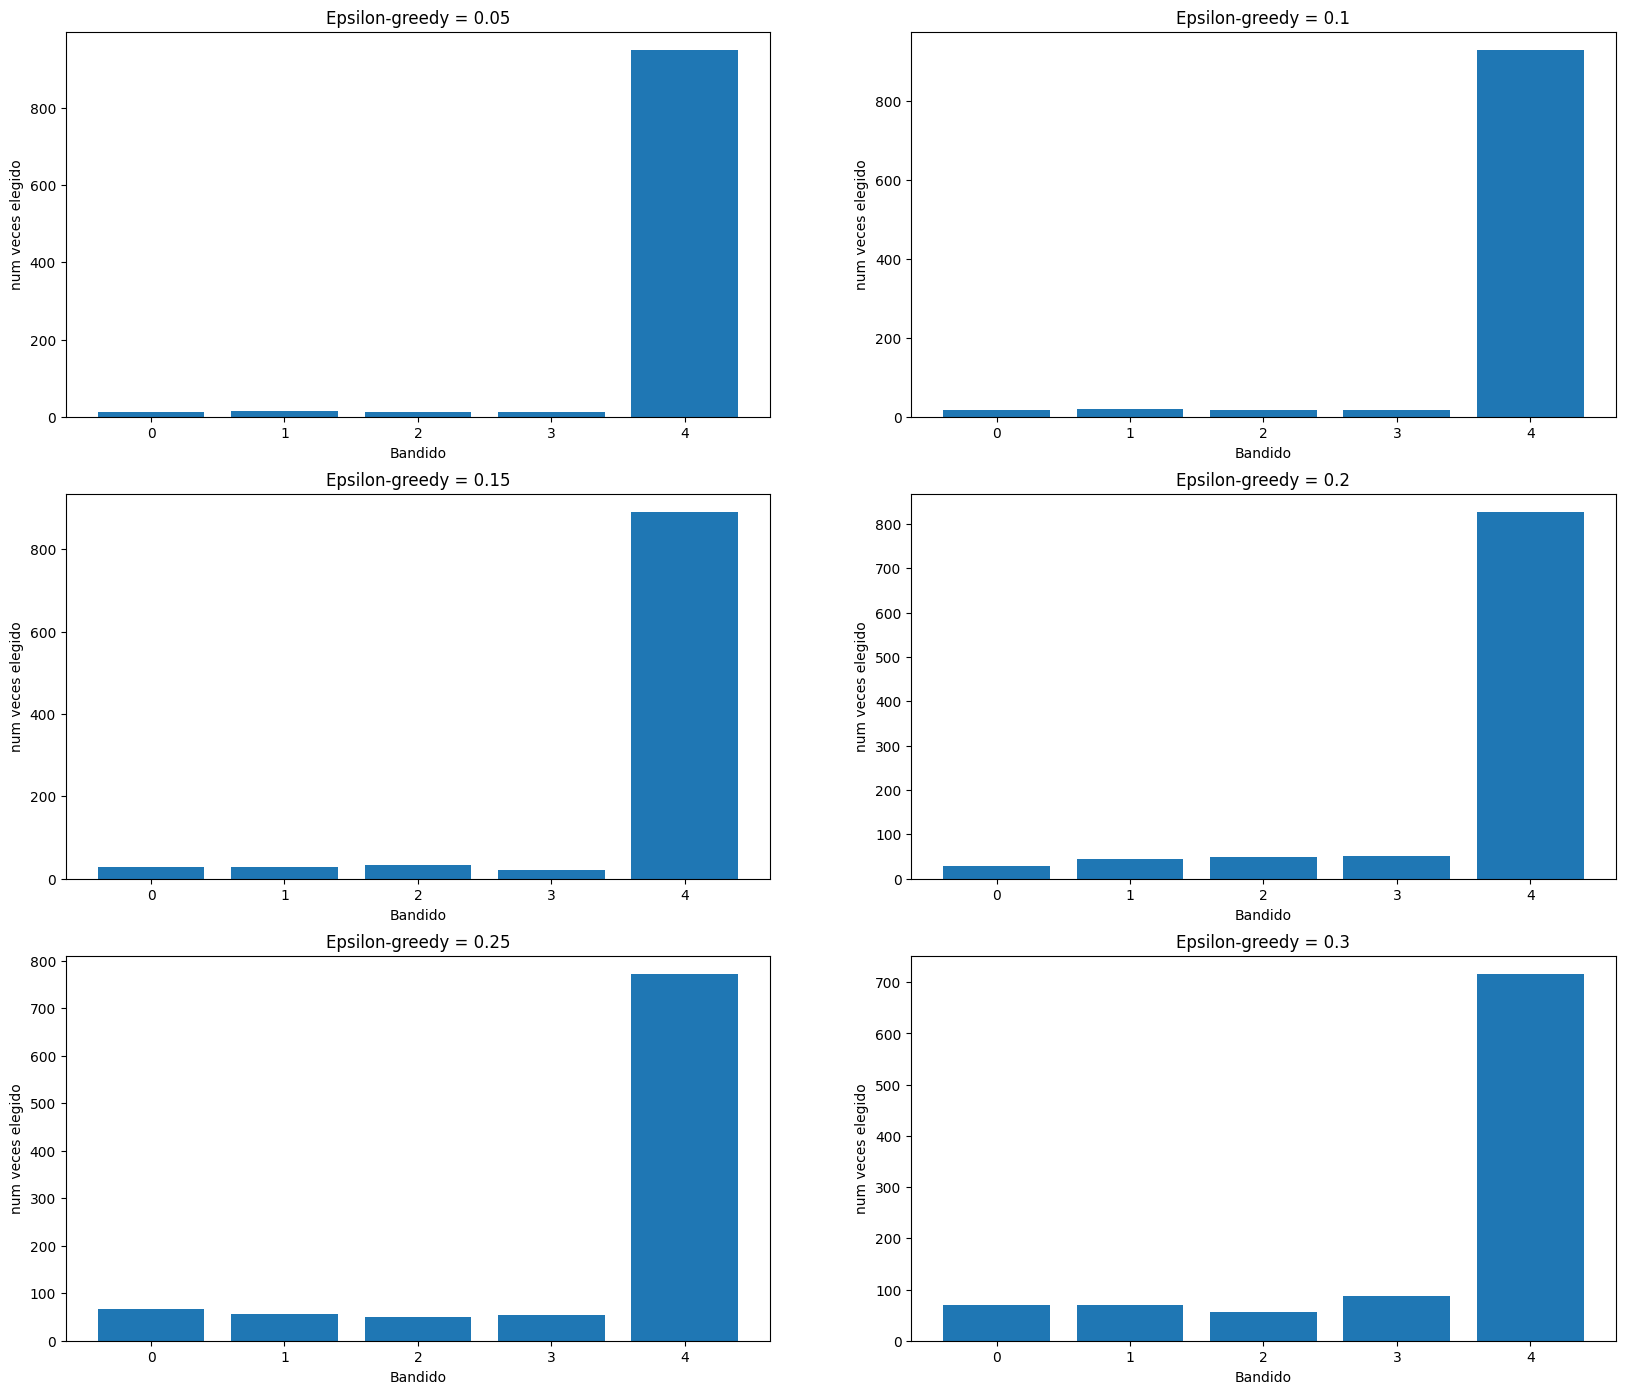

In [38]:
#Generamos un primer ejercicio con un un rango entre 0.05-0.30 de exploración

epsilon_range = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] # PREGUNTA 1

np.set_printoptions(precision=4)

plt.figure(figsize=(20, 35))
pos = 0
for ep in epsilon_range:
    pos += 1    

    bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit_v(num_games=1000, 
                                                                            epsilon=ep, 
                                                                            verbose=False)

    print('Epsilon-greedy = {epsi}'.format(epsi=ep))
    print("Initial Bandits Distribution\n  {}".format(bandits))
    print("Bandits Distribution games\n  {}".format(num_selected_bandit))
    print("Q(a) Bandits\n  {}".format(q_bandits))
    print("CLICKS: {}".format(total_reward))
    print("")
    print("-----------------------------------------------------")
    print("")

    # Mostramos en una gráfica de barras el número de veces que elegimos cada imagen
    plt.subplot(6, 2, pos)
    plt.title('Epsilon-greedy = {epsi}'.format(epsi=ep))
    plt.bar(range(0,len(bandits)), num_selected_bandit)
    plt.xlabel('Bandido')
    plt.ylabel('num veces elegido')

plt.show()

### Respuestas a las preguntas:

Imagen E (en la gráfica la imagen 4) es a la cual aleatoriamente se le asignó mayor probabilidad (0.60)

* Modificando la constante "EPSILON" que es el ratio de exploración:

1. ¿Cuál es el valor de épsilon que maximiza la imagen con mayor número de clicks?
    + ***RESPUESTA***: Al igual que en el ejercicio anterior, el valor de épsilon que maximiza el número de clicks varia en el rango de [0.05-0.2], siendo a partir de 0.25 que se evidencia una caída en el número de clicks.


2. ¿Cuál es la imagen que más clics obtiene y cuántos?
    + ***RESPUESTA***: Es la imagen E (en la gráfica la imagen 4) con un número de clicks que ronda entorno a 560.

Initial Bandits Distribution
  [0.3, 0.2, 0.1, 0.1, 0.6]
Bandits Distribution games
  [  2.   0.   3. 994.   1.]
Q(a) Bandits
  [0.     0.     0.     0.0926 0.    ]
CLICKS: 92


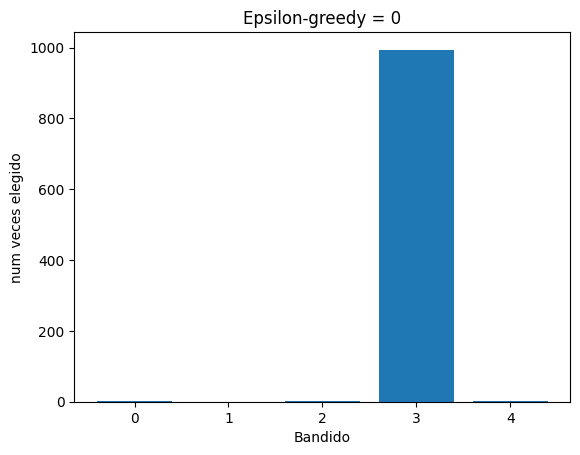

In [39]:
#Generamos un ejercicio adicional con un ratio de explotación del 100%

EPSILON = 0   # PREGUNTA 3

np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit_v(num_games=1000, 
                                                                           epsilon=EPSILON, 
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("CLICKS: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene?
    + ***RESPUESTA***: Con este ratio de exploración a 0 (epsilon a 0) que significa que explotamos el 100% de las veces, vemos que vamos a seleccionar como imagen a mostrar aquella que primero obtenga un click, ya que una vez que esa haya obtenido recompensa se seleccionará la misma ya que estaremos explotando la información que tenemos, sin explorar las otras opciones.